In [1]:
#importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:

resturant_train = pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx?raw=true', engine='openpyxl')
resturant_test = pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx?raw=true', engine='openpyxl')
                               

In [3]:
# Checking the dimension resturant_train
resturant_train.shape

(12690, 9)

In [4]:
# Checking the dimension of resturant_test
resturant_test.shape

(4231, 8)

In [5]:
# Checking the features present in the resturant_test
resturant_test.columns.to_list()

['TITLE',
 'RESTAURANT_ID',
 'CUISINES',
 'TIME',
 'CITY',
 'LOCALITY',
 'RATING',
 'VOTES']

In [6]:
# Checking the features present in the resturant_train
resturant_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [25]:
resturant_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [26]:
resturant_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [14]:
#checking for duplicated values
resturant_train.duplicated().sum()

25

In [18]:
#checking for duplicated values
resturant_test.duplicated().sum()

1

In [19]:
#Checking the data types of all the features-
resturant_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

There are 9 attributes with contains (2)integer and(7) object datatypes.

In [16]:
#Checking the data types of all the features-
resturant_test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

There are 8 attributes with contains (1)integer and(7) object datatypes.

In [20]:
# Checking the information about the dataset
resturant_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


The columns 'city', 'locality', 'rating', and 'votes' contain missing values.

In [21]:
# Checking the information about the dataset
resturant_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


The columns 'city', 'locality', 'rating', and 'votes' contain missing values.

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64


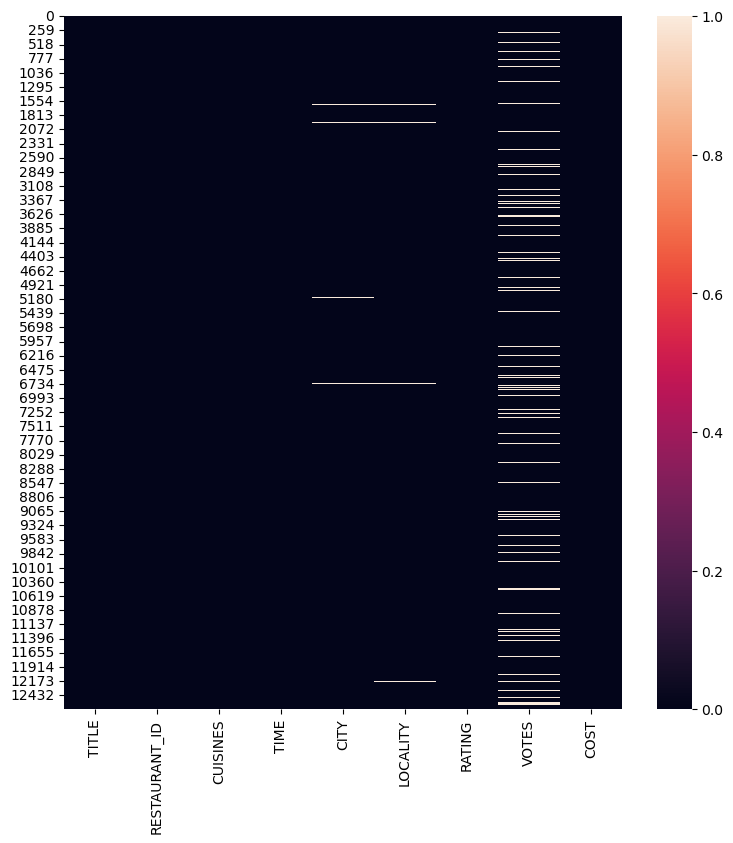

In [22]:
# Checking for missing values in the train dataset-
    
plt.figure(figsize=[9,9])
sns.heatmap(resturant_train.isnull())

print(resturant_train.isna().sum())

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


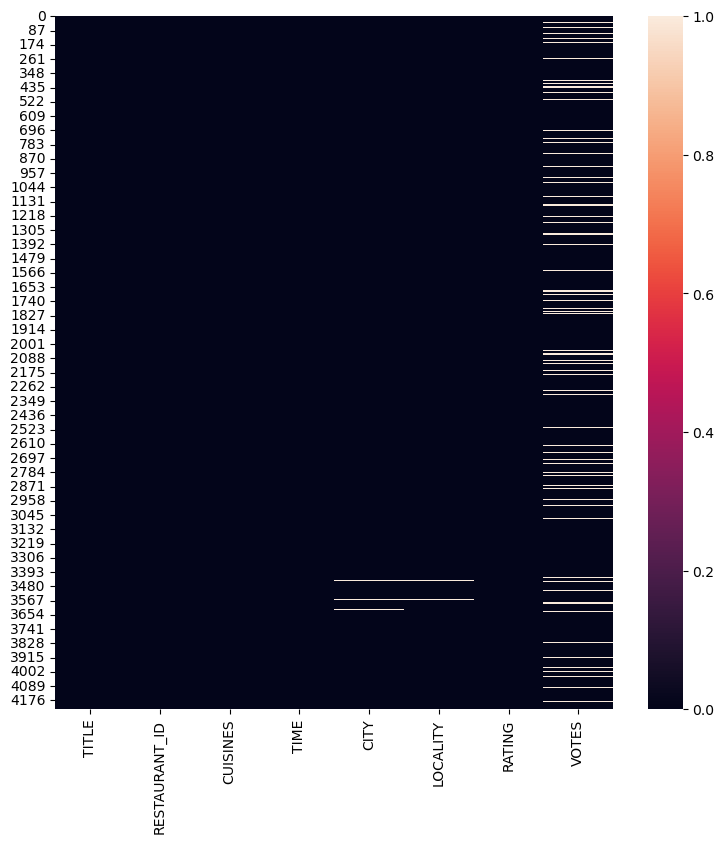

In [24]:
# Checking for missing values in the test dataset-
    
plt.figure(figsize=[9,9])
sns.heatmap(resturant_test.isnull())

print(resturant_test.isna().sum())

graph indicies The columns 'city', 'locality', 'rating', and 'votes' contain missing values.

In [30]:
# Drop the null values & Check for null values from train dataset

resturant_train.dropna(subset = ['CITY'],inplace = True)
resturant_train.dropna(subset = ['LOCALITY'],inplace = True)
resturant_train.dropna(subset = ['RATING'],inplace = True)
resturant_train.dropna(subset = ['VOTES'],inplace = True)

resturant_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [31]:
# Drop the null values & Check for null values from test dataset

resturant_test.dropna(subset = ['CITY'],inplace = True)
resturant_test.dropna(subset = ['LOCALITY'],inplace = True)
resturant_test.dropna(subset = ['RATING'],inplace = True)
resturant_test.dropna(subset = ['VOTES'],inplace = True)

resturant_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

Remove the rows with null values from both the training and test datasets.

In [29]:
#Checking the nunique values 

resturant_train.nunique().to_frame('Number of unique values')

,Number of unique values
TITLE,113
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,32
VOTES,1847
COST,86


In [32]:
#Checking the nunique values 

resturant_test.nunique().to_frame('Number of unique values')

,Number of unique values
TITLE,83
RESTAURANT_ID,3702
CUISINES,1621
TIME,1120
CITY,142
LOCALITY,777
RATING,29
VOTES,1133


In [36]:
#checking the value count for each columns in train dataset

for col in resturant_train.columns:   
    print('-' * 50 + col + '-' * 50 )
    display(resturant[col].value_counts().head())

--------------------------------------------------TITLE--------------------------------------------------


CASUAL DINING         5
CASUAL DINING,BAR     2
QUICK BITES           2
FINE DINING           1
CAFÉ,CASUAL DINING    1
Name: TITLE, dtype: int64

--------------------------------------------------RESTAURANT_ID--------------------------------------------------


12430    1
13332    1
15338    1
1779     1
2262     1
Name: RESTAURANT_ID, dtype: int64

--------------------------------------------------CUISINES--------------------------------------------------


Continental, Italian, Pizza, Seafood                   1
Cafe, Continental, Mediterranean, Italian, Desserts    1
Japanese, Asian, Chinese, Thai, Sushi                  1
Biryani, North Indian, Hyderabadi                      1
Chinese, Asian, Thai, Vietnamese, Momos                1
Name: CUISINES, dtype: int64

--------------------------------------------------TIME--------------------------------------------------


12noon – 12midnight (Mon-Sun)                       2
12:30pm – 12:30AM (Mon-Sun)                         2
12:30pm – 2:45pm, 7pm – 11:45pm (Mon),12:30pm...    1
10am – 10pm (Mon),12noon – 11pm (Tue),10am –...     1
12noon – 11pm (Mon-Sun)                             1
Name: TIME, dtype: int64

--------------------------------------------------CITY--------------------------------------------------


Mumbai       4
Bangalore    4
New Delhi    3
Bengaluru    1
Powai        1
Name: CITY, dtype: int64

--------------------------------------------------LOCALITY--------------------------------------------------


Connaught Place        2
Jayanagar              1
Nehru Place            1
Hiranandani Gardens    1
Mazgaon                1
Name: LOCALITY, dtype: int64

--------------------------------------------------RATING--------------------------------------------------


4.1    4
3.9    4
4.3    2
3.6    1
3.7    1
Name: RATING, dtype: int64

--------------------------------------------------VOTES--------------------------------------------------


250 votes     1
824 votes     1
393 votes     1
1954 votes    1
1002 votes    1
Name: VOTES, dtype: int64

--------------------------------------------------COST--------------------------------------------------


800     4
3300    1
1500    1
200     1
600     1
Name: COST, dtype: int64

In [35]:
#checking the value count for each columns in test dataset

for col in resturant_test.columns:   
    print('-' * 50 + col + '-' * 50 )
    display(resturant[col].value_counts().head())

--------------------------------------------------TITLE--------------------------------------------------


CASUAL DINING         5
CASUAL DINING,BAR     2
QUICK BITES           2
FINE DINING           1
CAFÉ,CASUAL DINING    1
Name: TITLE, dtype: int64

--------------------------------------------------RESTAURANT_ID--------------------------------------------------


12430    1
13332    1
15338    1
1779     1
2262     1
Name: RESTAURANT_ID, dtype: int64

--------------------------------------------------CUISINES--------------------------------------------------


Continental, Italian, Pizza, Seafood                   1
Cafe, Continental, Mediterranean, Italian, Desserts    1
Japanese, Asian, Chinese, Thai, Sushi                  1
Biryani, North Indian, Hyderabadi                      1
Chinese, Asian, Thai, Vietnamese, Momos                1
Name: CUISINES, dtype: int64

--------------------------------------------------TIME--------------------------------------------------


12noon – 12midnight (Mon-Sun)                       2
12:30pm – 12:30AM (Mon-Sun)                         2
12:30pm – 2:45pm, 7pm – 11:45pm (Mon),12:30pm...    1
10am – 10pm (Mon),12noon – 11pm (Tue),10am –...     1
12noon – 11pm (Mon-Sun)                             1
Name: TIME, dtype: int64

--------------------------------------------------CITY--------------------------------------------------


Mumbai       4
Bangalore    4
New Delhi    3
Bengaluru    1
Powai        1
Name: CITY, dtype: int64

--------------------------------------------------LOCALITY--------------------------------------------------


Connaught Place        2
Jayanagar              1
Nehru Place            1
Hiranandani Gardens    1
Mazgaon                1
Name: LOCALITY, dtype: int64

--------------------------------------------------RATING--------------------------------------------------


4.1    4
3.9    4
4.3    2
3.6    1
3.7    1
Name: RATING, dtype: int64

--------------------------------------------------VOTES--------------------------------------------------


250 votes     1
824 votes     1
393 votes     1
1954 votes    1
1002 votes    1
Name: VOTES, dtype: int64

In [39]:
# Dropping features Restaurant ID

resturant_train.drop(['RESTAURANT_ID'],axis=1,inplace=True)
resturant_test.drop(['RESTAURANT_ID'],axis=1,inplace=True)


In [40]:
# Checking the dimension of the dataset

resturant_train.shape

(11393, 8)

In [41]:
# Checking the dimension of the dataset

resturant_test.shape

(3797, 7)

In [55]:
# Splitting the dataset into Categorical and Numerical for train

cat_col=[]

for i in resturant_train.columns:
    if resturant_train[i].dtypes == 'object':
        cat_col.append(i)
        
num_col=[]

for i in resturant_train.columns:
    if resturant_train[i].dtypes != 'object':
        num_col.append(i)
        

In [56]:
cat_col

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']

In [57]:
num_col

['COST']

In [58]:
# Splitting the dataset into Categorical and Numerical for test

cat_col1=[]

for i in resturant_test.columns:
    if resturant_test[i].dtypes == 'object':
        cat_col1.append(i)
        
num_col1=[]

for i in resturant_test.columns:
    if resturant_test[i].dtypes != 'object':
        num_col1.append(i)

In [59]:
cat_col1

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']

In [60]:
num_col1

[]

In [61]:
for i in cat_col:
    print ("\033[1m"+i+"\033[0m")
    print(resturant_train[i].value_counts())
    print('*'*75)

TITLE
QUICK BITES                 3674
CASUAL DINING               3399
None                         800
CAFÉ                         543
DESSERT PARLOR               340
                            ... 
SWEET SHOP,CONFECTIONERY       1
BAKERY,FOOD COURT              1
QUICK BITES,BAR                1
MEAT SHOP                      1
BAR,MICROBREWERY               1
Name: TITLE, Length: 111, dtype: int64
***************************************************************************
CUISINES
North Indian, Chinese                       457
South Indian                                456
North Indian                                449
Fast Food                                   238
Chinese                                     155
                                           ... 
North Indian, Maharashtrian, Continental      1
American, North Indian, Asian                 1
Beverages, Fast Food, Tea, Juices             1
BBQ, Rolls                                    1
Finger Food, Continental, A

In [62]:
for i in cat_col1:
    print ("\033[1m"+i+"\033[0m")
    print(resturant_test[i].value_counts())
    print('*'*75)

TITLE
QUICK BITES                 1225
CASUAL DINING               1157
None                         240
CAFÉ                         205
DESSERT PARLOR               109
                            ... 
CASUAL DINING,FOOD COURT       1
PUB,FINE DINING                1
BEVERAGE SHOP,CAFÉ             1
BAR,PUB                        1
BHOJANALYA                     1
Name: TITLE, Length: 83, dtype: int64
***************************************************************************
CUISINES
North Indian, Chinese                                              199
North Indian                                                       172
South Indian                                                       146
Fast Food                                                           63
Chinese                                                             53
                                                                  ... 
Chinese, Thai, Tibetan, Vietnamese, Malaysian, Fast Food, Asian      1
Continental

In [63]:
#Checking the statistical summary
resturant_train.describe(include='object')

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,11393,11393,11393,11393,11393,11393,11393
unique,111,3913,2543,336,1311,30,1846
top,QUICK BITES,"North Indian, Chinese",11am – 11pm (Mon-Sun),Chennai,Gachibowli,3.9,44 votes
freq,3674,457,1246,2135,166,1236,69


In [64]:
#Checking the statistical summary
resturant_test.describe(include='object')

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,3797,3797,3797,3797,3797,3797,3797
unique,83,1621,1120,142,777,29,1133
top,QUICK BITES,"North Indian, Chinese",11am – 11pm (Mon-Sun),Chennai,Kukatpally,3.8,6 votes
freq,1225,199,373,671,54,411,30


In [65]:
resturant_train.describe()

,COST
count,11393.000000
mean,682.670148
std,646.942238
min,50.000000
25%,300.000000
50%,500.000000
75%,800.000000
max,14000.000000


<Axes: >

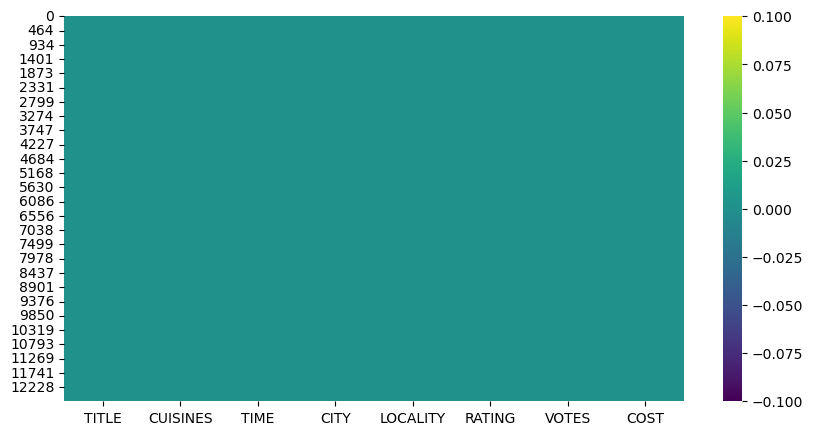

In [67]:
# Visualizing the dataset in heatmap

plt.figure(figsize=(10,5))
sns.heatmap(resturant_train.isnull(),cmap='viridis')

<Axes: >

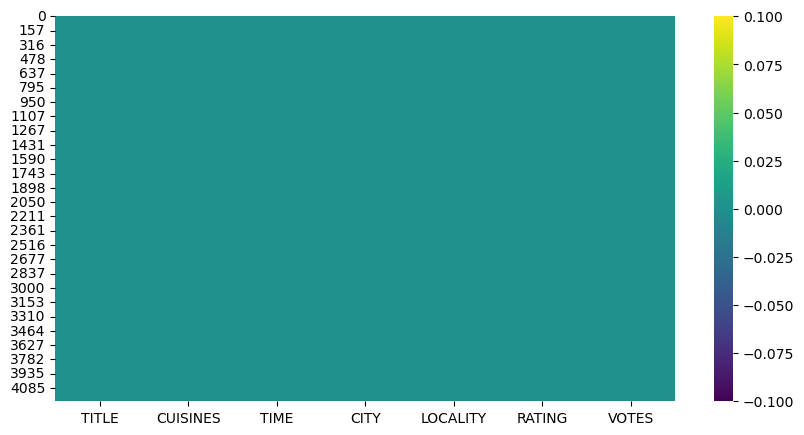

In [68]:
# Visualizing the dataset in heatmap

plt.figure(figsize=(10,5))
sns.heatmap(resturant_test.isnull(),cmap='viridis')

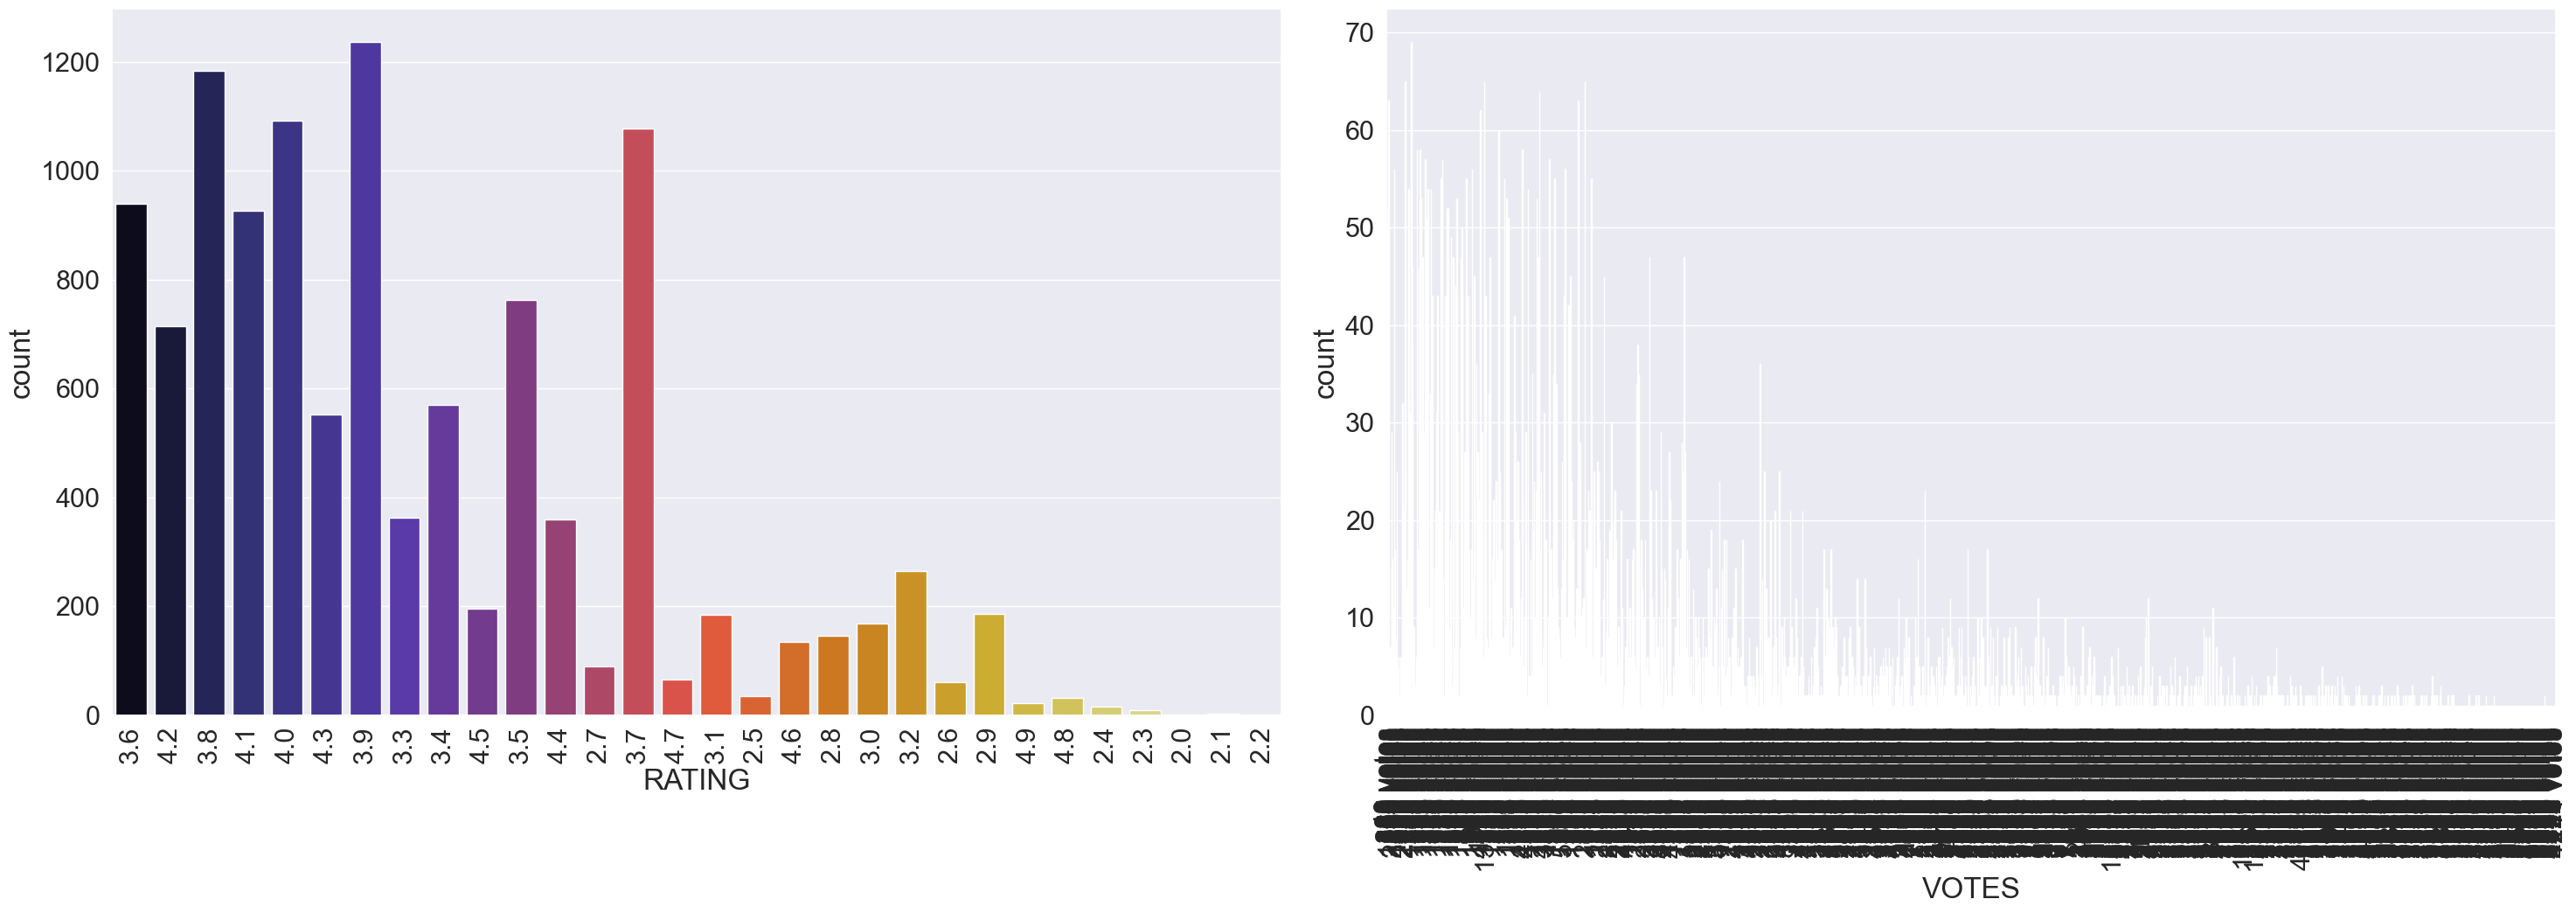

In [69]:
#for train dataset
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
p=1
for i in cat_col[5:]:
    if p<=5:
        ax=plt.subplot(3,2,p)
        sns.countplot(x=resturant_train[i],palette='CMRmap')
        plt.xticks(rotation=90)
        p+=1
plt.tight_layout()

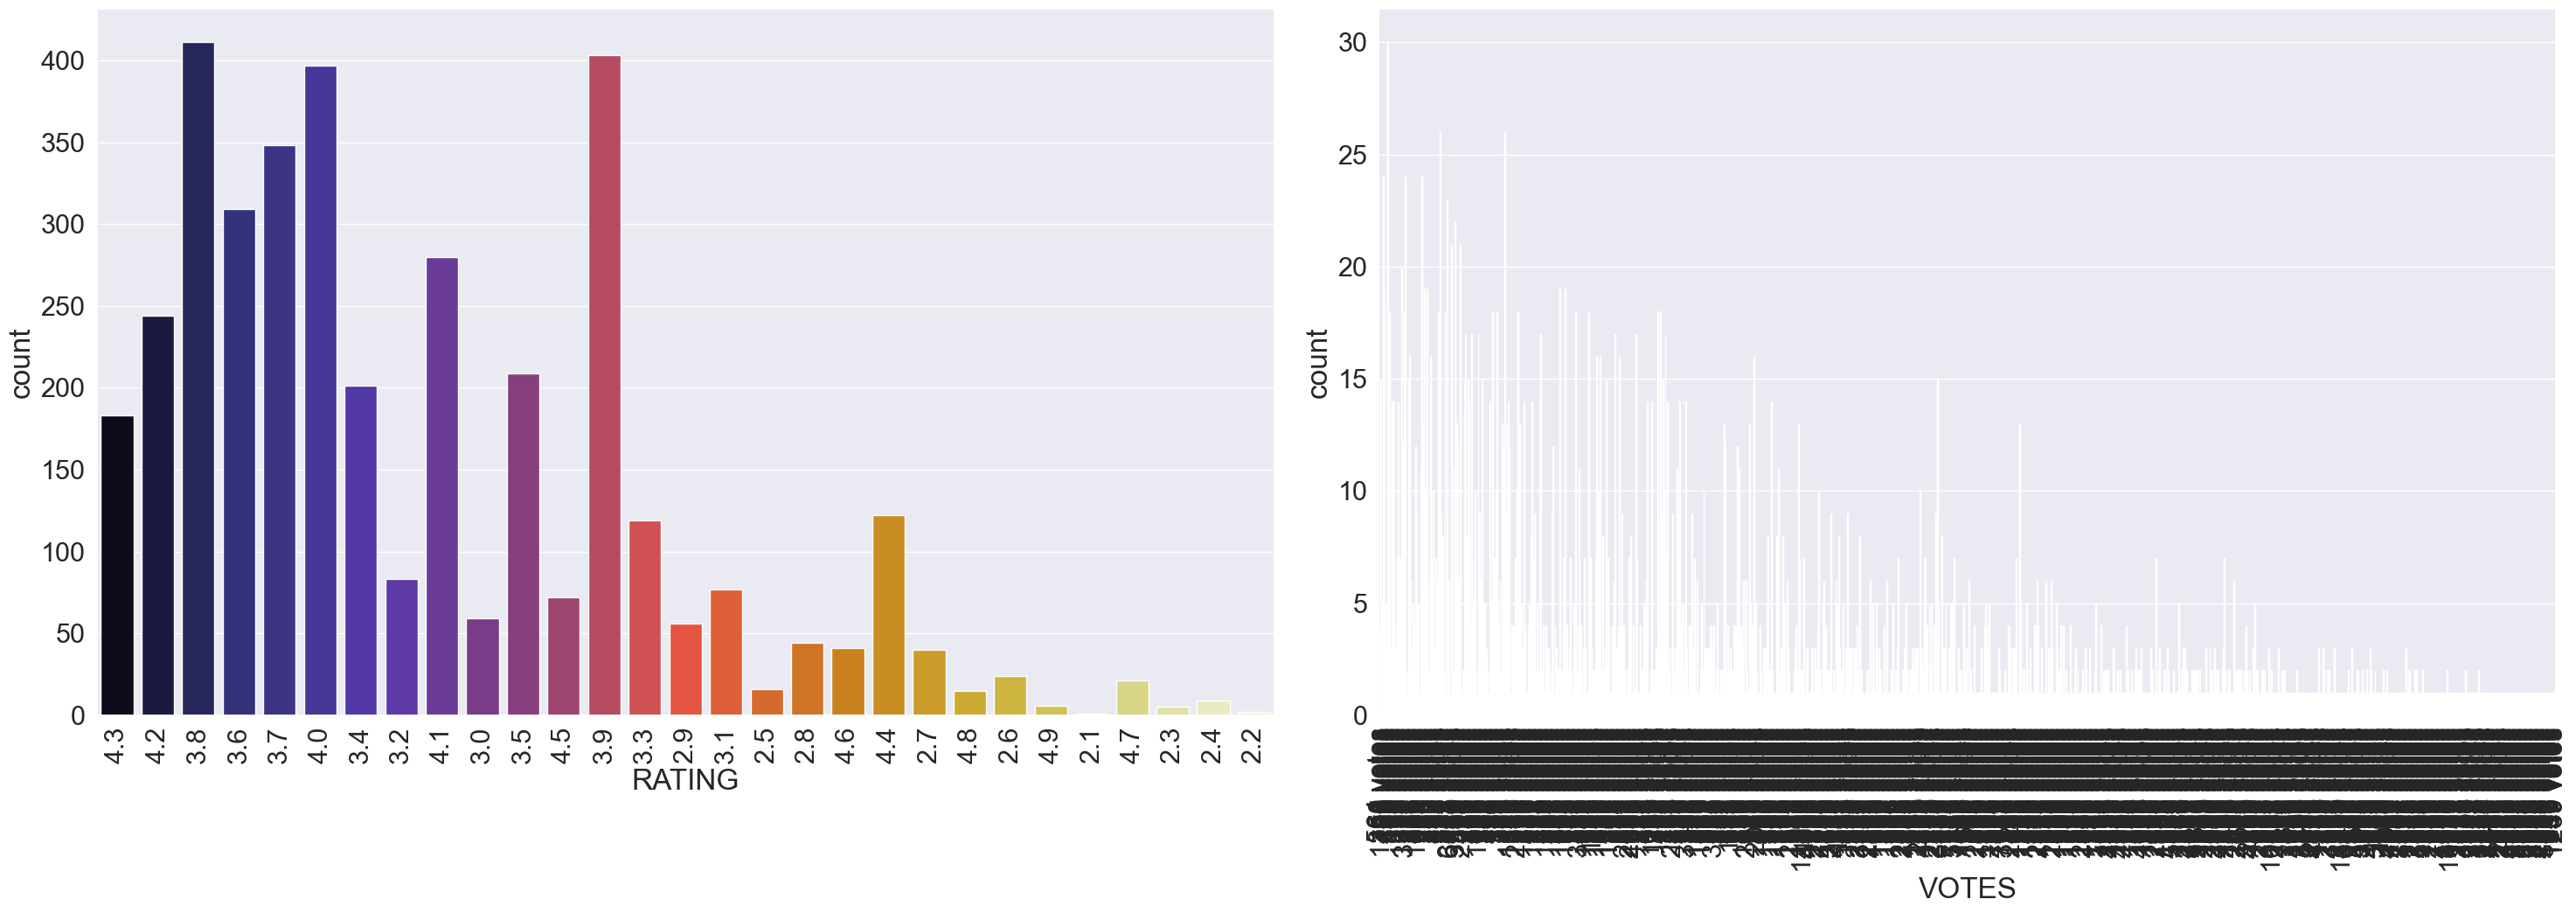

In [70]:
#for test dataset
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
p=1
for i in cat_col[5:]:
    if p<=5:
        ax=plt.subplot(3,2,p)
        sns.countplot(x=resturant_test[i],palette='CMRmap')
        plt.xticks(rotation=90)
        p+=1
plt.tight_layout()

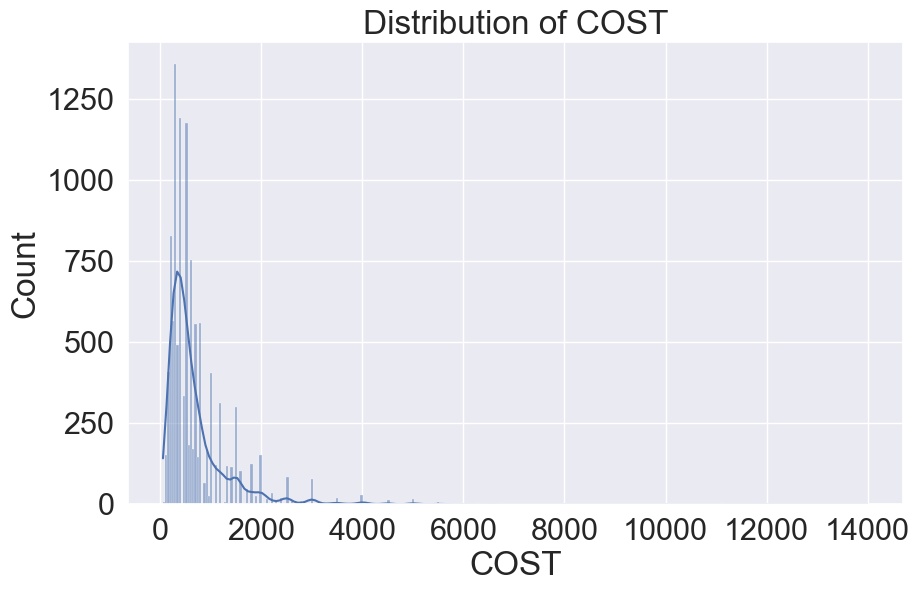

In [71]:
# Distribution of the target variable fro train dataset
plt.figure(figsize=(10, 6))
sns.histplot(resturant_train['COST'], kde=True)
plt.title('Distribution of COST')
plt.show()


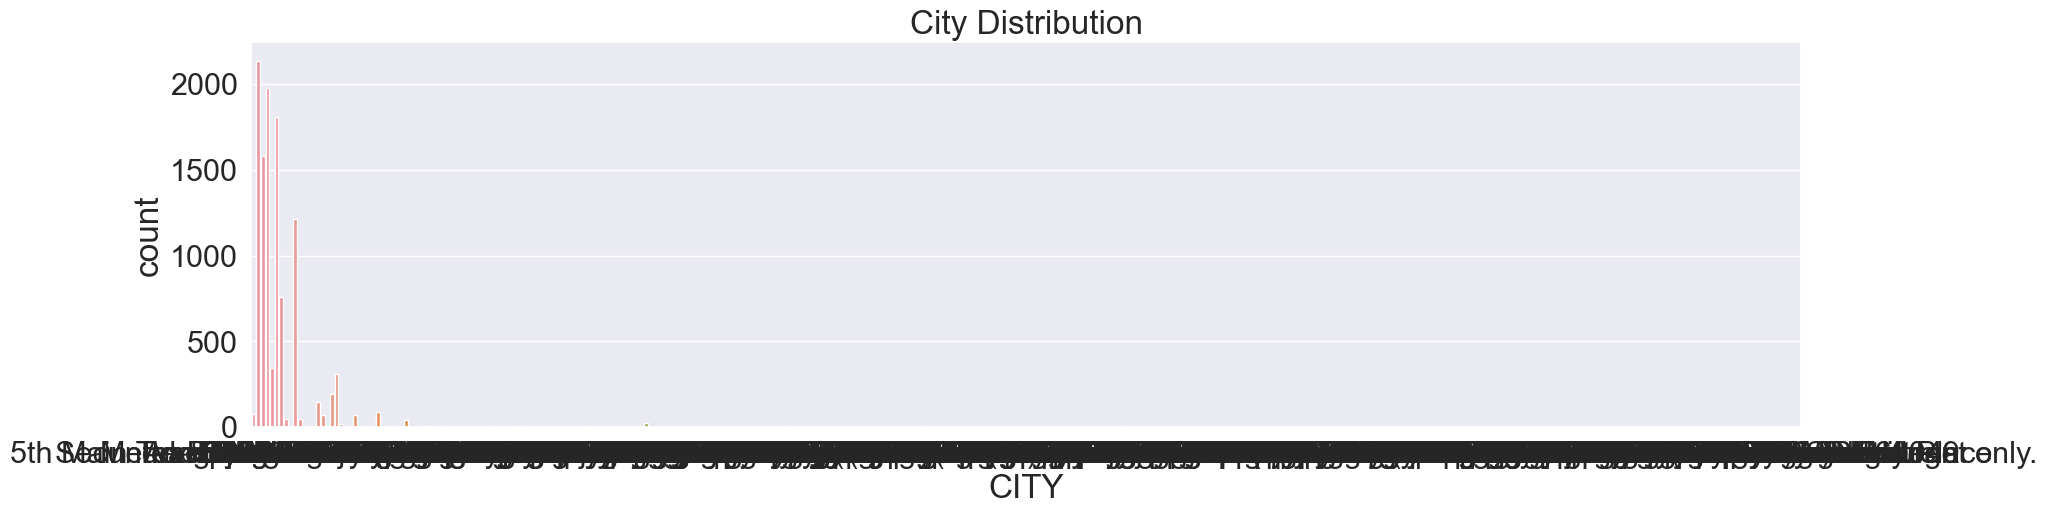

In [88]:
# Visualize categorical features
plt.figure(figsize=(20, 5))
sns.countplot(x=resturant_train['CITY'])
plt.title('City Distribution')
plt.show()

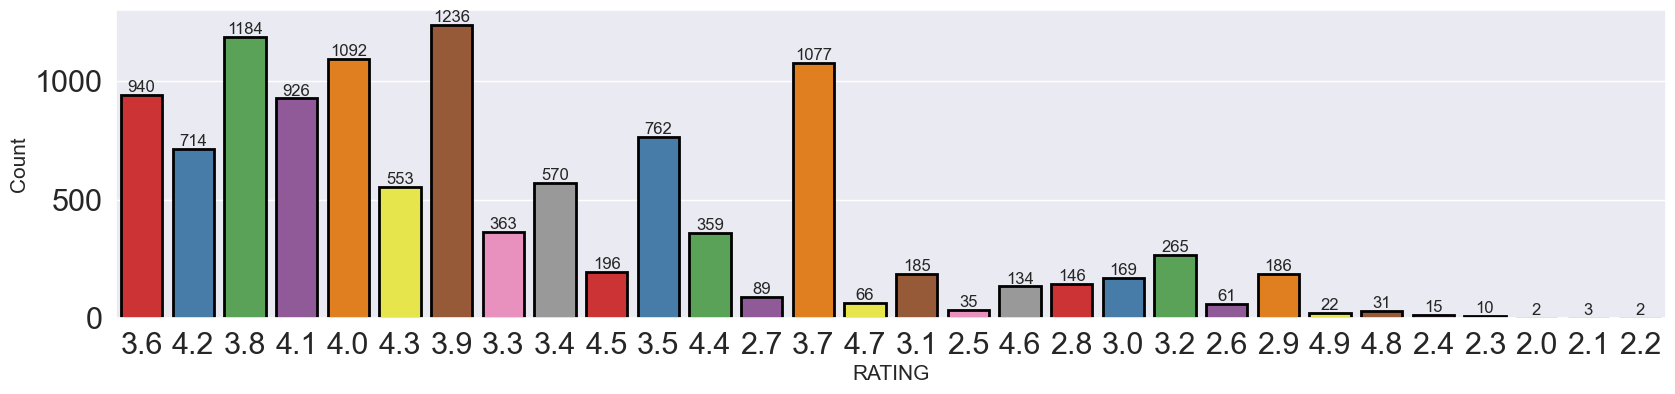

In [82]:
# Visualizing the feature 'RATING' in countplot fro train datsset

plt.figure(figsize=(20,4))
ab = sns.countplot(x =resturant_train['RATING'],palette='Set1',linewidth=2,edgecolor='black')
plt.xlabel('RATING',fontsize=15)
plt.ylabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

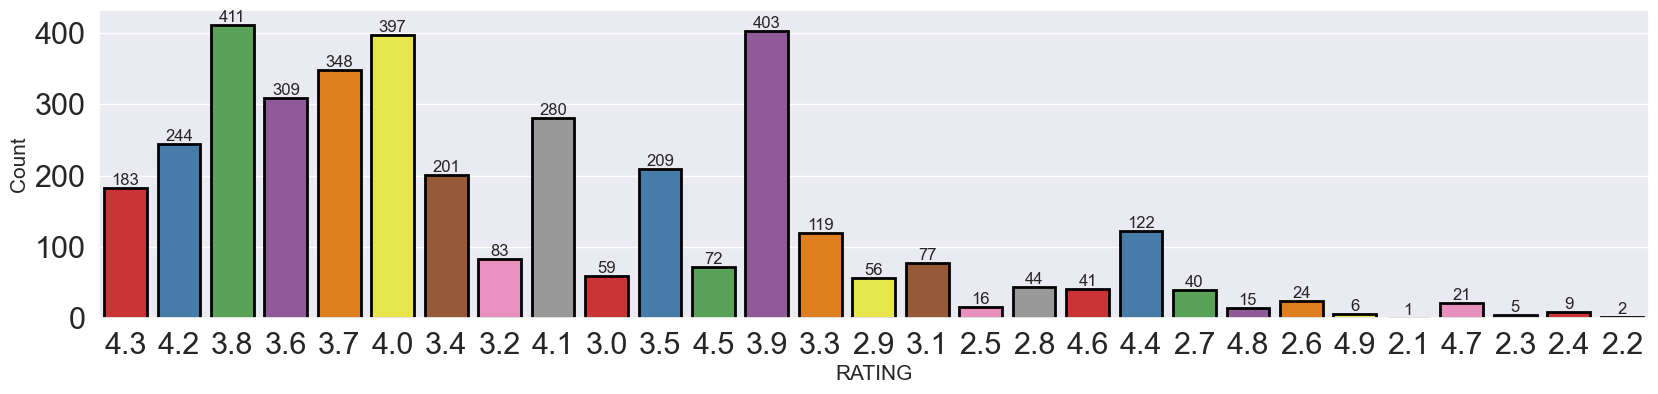

In [89]:
# Visualizing the feature 'RATING' in countplot fro test datsset

plt.figure(figsize=(20,4))
ab = sns.countplot(x =resturant_test['RATING'],palette='Set1',linewidth=2,edgecolor='black')
plt.xlabel('RATING',fontsize=15)
plt.ylabel('Count',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)
plt.show()

<Figure size 2000x400 with 0 Axes>

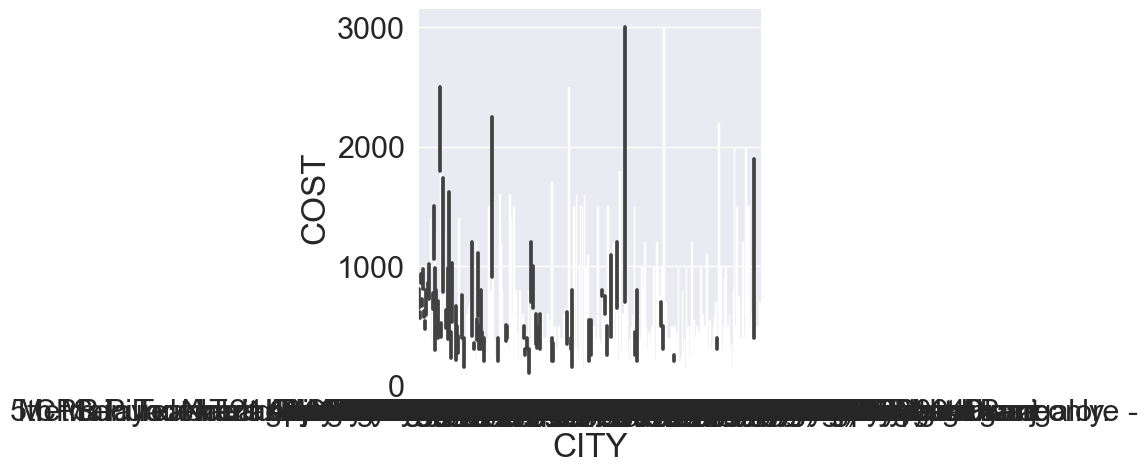

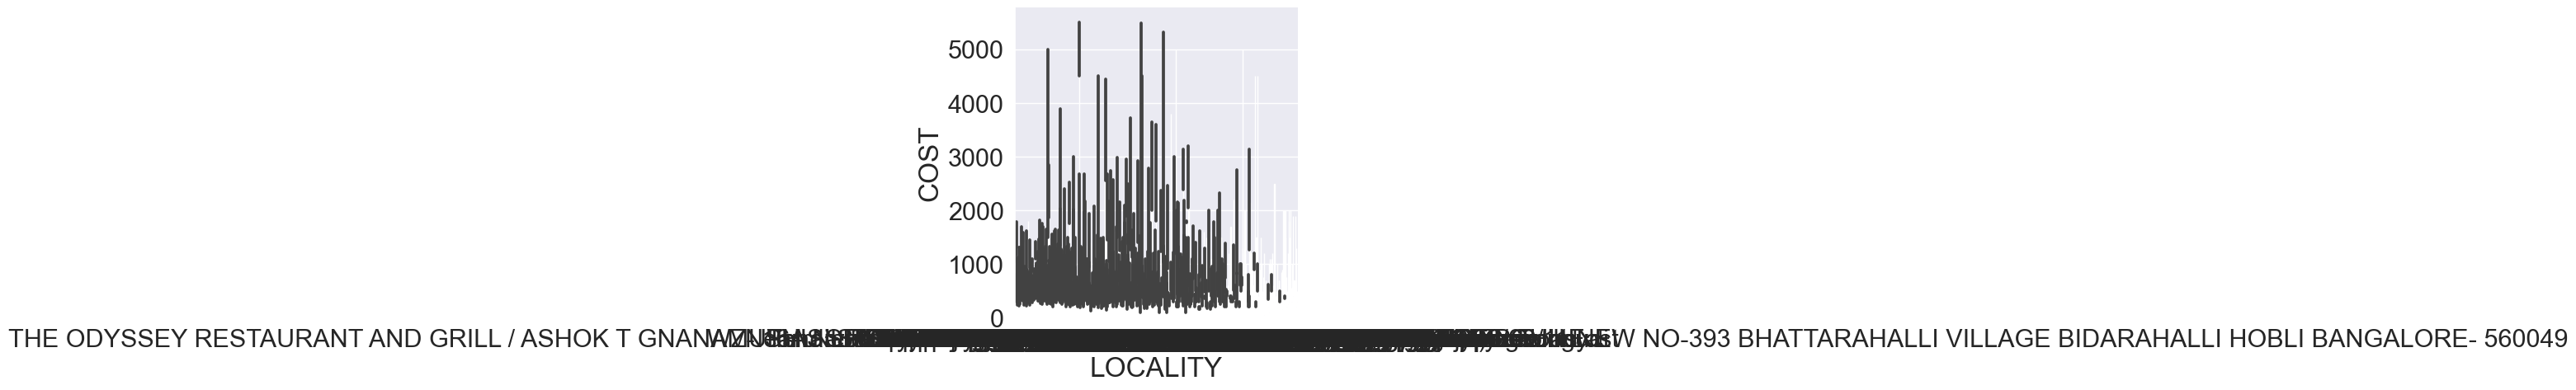

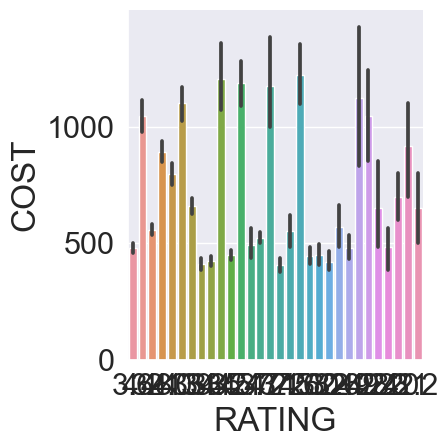

In [92]:
plt.figure(figsize=(20,4))
cols = ['CITY','LOCALITY','RATING']
for i in cols:
    sns.catplot(x= i,y='COST',data=resturant_train,kind='bar')

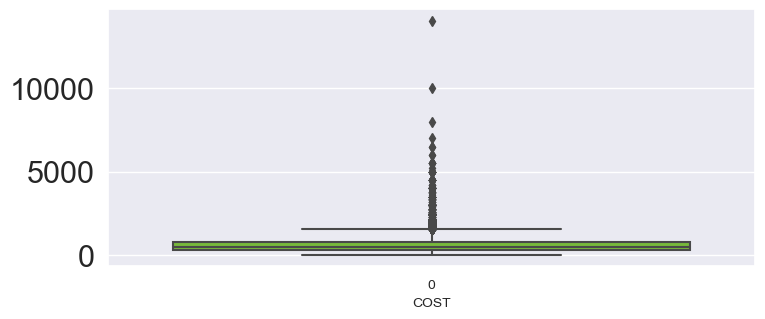

In [97]:
# Visualizing the dataset with Boxplot to check outliers

plt.figure(figsize=(15,10))
st = 1
for i in num_col:
    if st <=6:
        sub = plt.subplot(3,2,st)
        sns.boxplot(resturant_train[i],color='#76cd26')
        plt.xlabel(i,fontsize=10)
        plt.xticks(fontsize=10)
    st+=1
plt.tight_layout()


# Transform Categorical Data into Numerical Representation for test dataset


In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in resturant_train.columns:
    if (resturant_train[i].dtypes == 'object'):
        resturant_train[i] = le.fit_transform(resturant_train[i].values.reshape(-1,1))
resturant_train.head(5)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,29,2463,700,300,267,16,1277,1200
1,31,275,1799,63,961,22,949,1500
2,29,2800,623,63,1015,18,711,800
3,93,3893,257,206,128,21,786,800
4,48,1663,581,206,573,18,469,300


In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in resturant_test.columns:
    if (resturant_test[i].dtypes == 'object'):
        resturant_test[i] = le.fit_transform(resturant_test[i].values.reshape(-1,1))
resturant_test.head(5)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,22,1210,480,103,619,22,822
1,73,1528,886,90,208,21,869
2,22,1368,206,90,388,17,574
3,64,190,1013,41,433,17,179
4,73,1532,198,74,283,15,394


In [102]:
resturant_train.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [101]:
resturant_test.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
dtype: int64

The dataset no longer contains any null values after the removal process.

In [103]:
resturant_train.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,11393.000000,11393.000000,11393.000000,11393.000000,11393.000000,11393.000000,11393.000000,11393.000000
mean,56.937330,2106.650224,1111.008953,131.931449,605.135258,17.842798,968.748530,682.670148
std,32.284877,1137.570277,706.530586,79.326582,367.522407,4.219024,502.002382,646.942238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,29.000000,1114.000000,524.000000,63.000000,313.000000,15.000000,568.000000,300.000000
50%,48.000000,2253.000000,1072.000000,125.000000,545.000000,18.000000,1020.000000,500.000000
75%,93.000000,3045.000000,1741.000000,206.000000,930.000000,21.000000,1380.000000,800.000000
max,110.000000,3912.000000,2542.000000,335.000000,1310.000000,29.000000,1845.000000,14000.000000


In [104]:
resturant_test.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000,3797.000000
mean,43.649197,873.074006,493.015539,54.872268,358.869897,16.806689,567.685805
std,25.784267,469.090685,319.074483,36.259482,220.143232,4.329005,321.966350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,454.000000,229.000000,18.000000,180.000000,15.000000,302.000000
50%,37.000000,947.000000,458.000000,55.000000,336.000000,17.000000,563.000000
75%,73.000000,1241.000000,783.000000,90.000000,543.000000,20.000000,838.000000
max,82.000000,1620.000000,1119.000000,141.000000,776.000000,28.000000,1132.000000


In [107]:
#Displaying the correlation in final train dataset
resturant_train.corr()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.240884,0.063145,-0.019796,0.028073,-0.165625,0.002441,-0.265785
CUISINES,0.240884,1.000000,0.107648,0.030720,0.019686,-0.065187,-0.003174,-0.017099
TIME,0.063145,0.107648,1.000000,-0.017181,-0.014200,0.049856,0.009439,0.033571
CITY,-0.019796,0.030720,-0.017181,1.000000,0.029376,0.055370,0.001871,0.055071
LOCALITY,0.028073,0.019686,-0.014200,0.029376,1.000000,-0.027435,0.003880,-0.013020
RATING,-0.165625,-0.065187,0.049856,0.055370,-0.027435,1.000000,-0.007886,0.326944
VOTES,0.002441,-0.003174,0.009439,0.001871,0.003880,-0.007886,1.000000,0.005390
COST,-0.265785,-0.017099,0.033571,0.055071,-0.013020,0.326944,0.005390,1.000000


<Axes: >

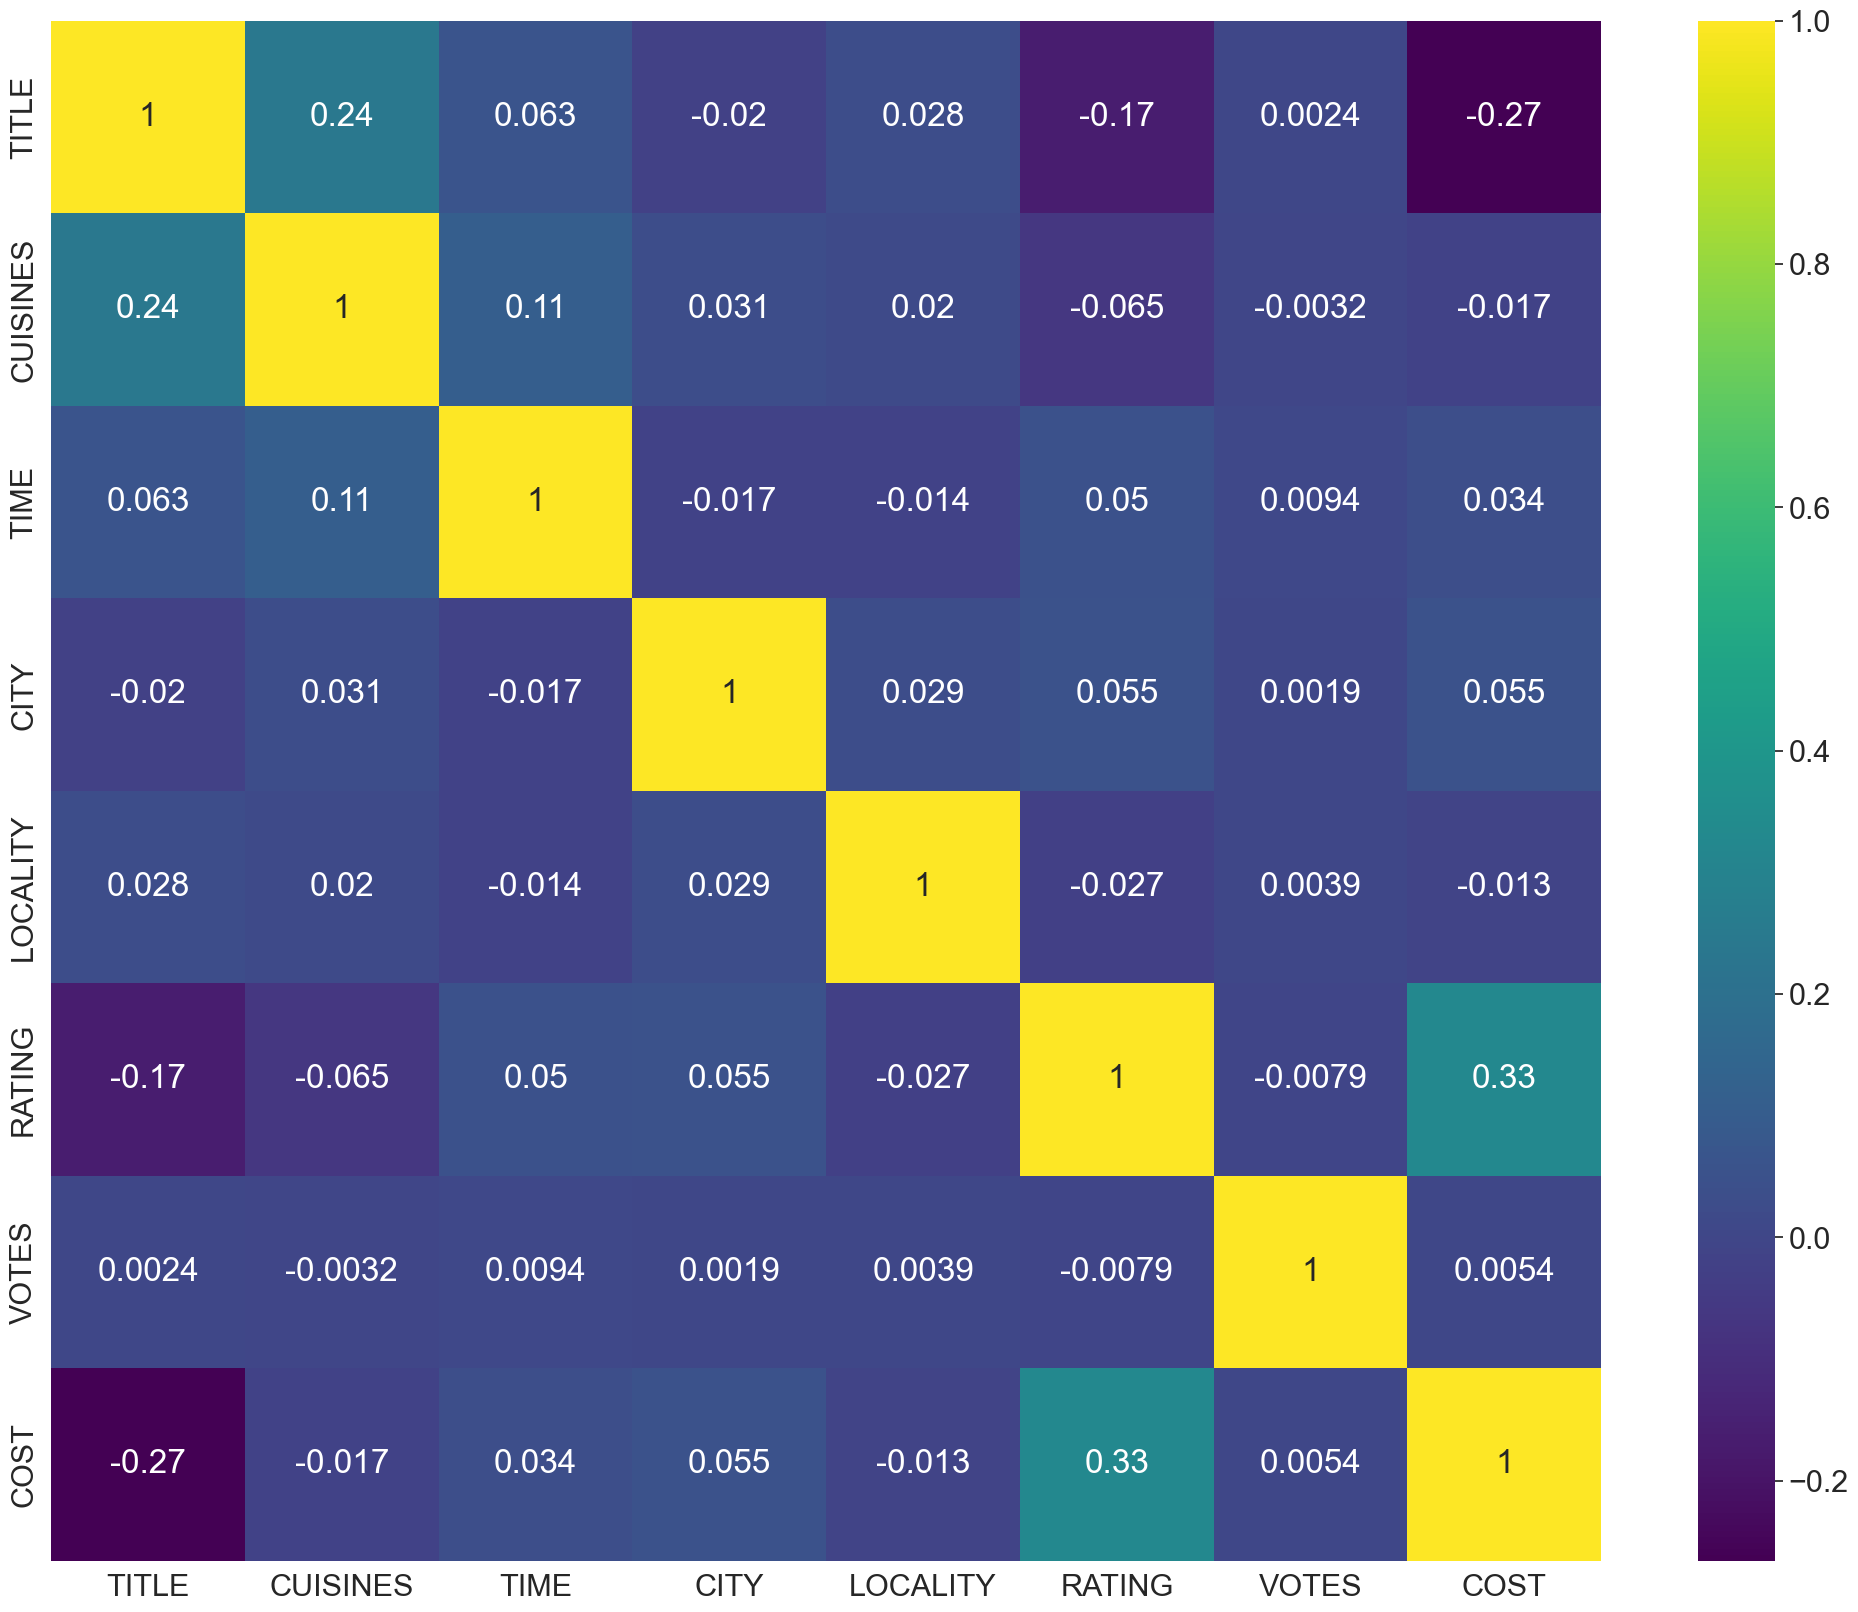

In [108]:
# Visualizing correlation of the dataset in heatmap

plt.figure(figsize=(25,20))
sns.heatmap(resturant_train.corr(),annot=True,cmap='viridis')

The column 'Cuisines','Locality' columns are negatively correlated with target variable whereas col 'Time','City' and 'Rating','votes' columns are positively correlated with each other.

In [105]:
#Displaying the correlation in final train dataset
resturant_test.corr()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
TITLE,1.000000,0.258631,0.065394,-0.019955,0.041293,-0.141593,-0.002309
CUISINES,0.258631,1.000000,0.125453,0.014419,0.021964,-0.076585,0.020212
TIME,0.065394,0.125453,1.000000,0.027826,-0.022983,0.036205,0.018504
CITY,-0.019955,0.014419,0.027826,1.000000,0.018897,0.052623,0.000957
LOCALITY,0.041293,0.021964,-0.022983,0.018897,1.000000,-0.030041,0.011873
RATING,-0.141593,-0.076585,0.036205,0.052623,-0.030041,1.000000,-0.009645
VOTES,-0.002309,0.020212,0.018504,0.000957,0.011873,-0.009645,1.000000


<Axes: >

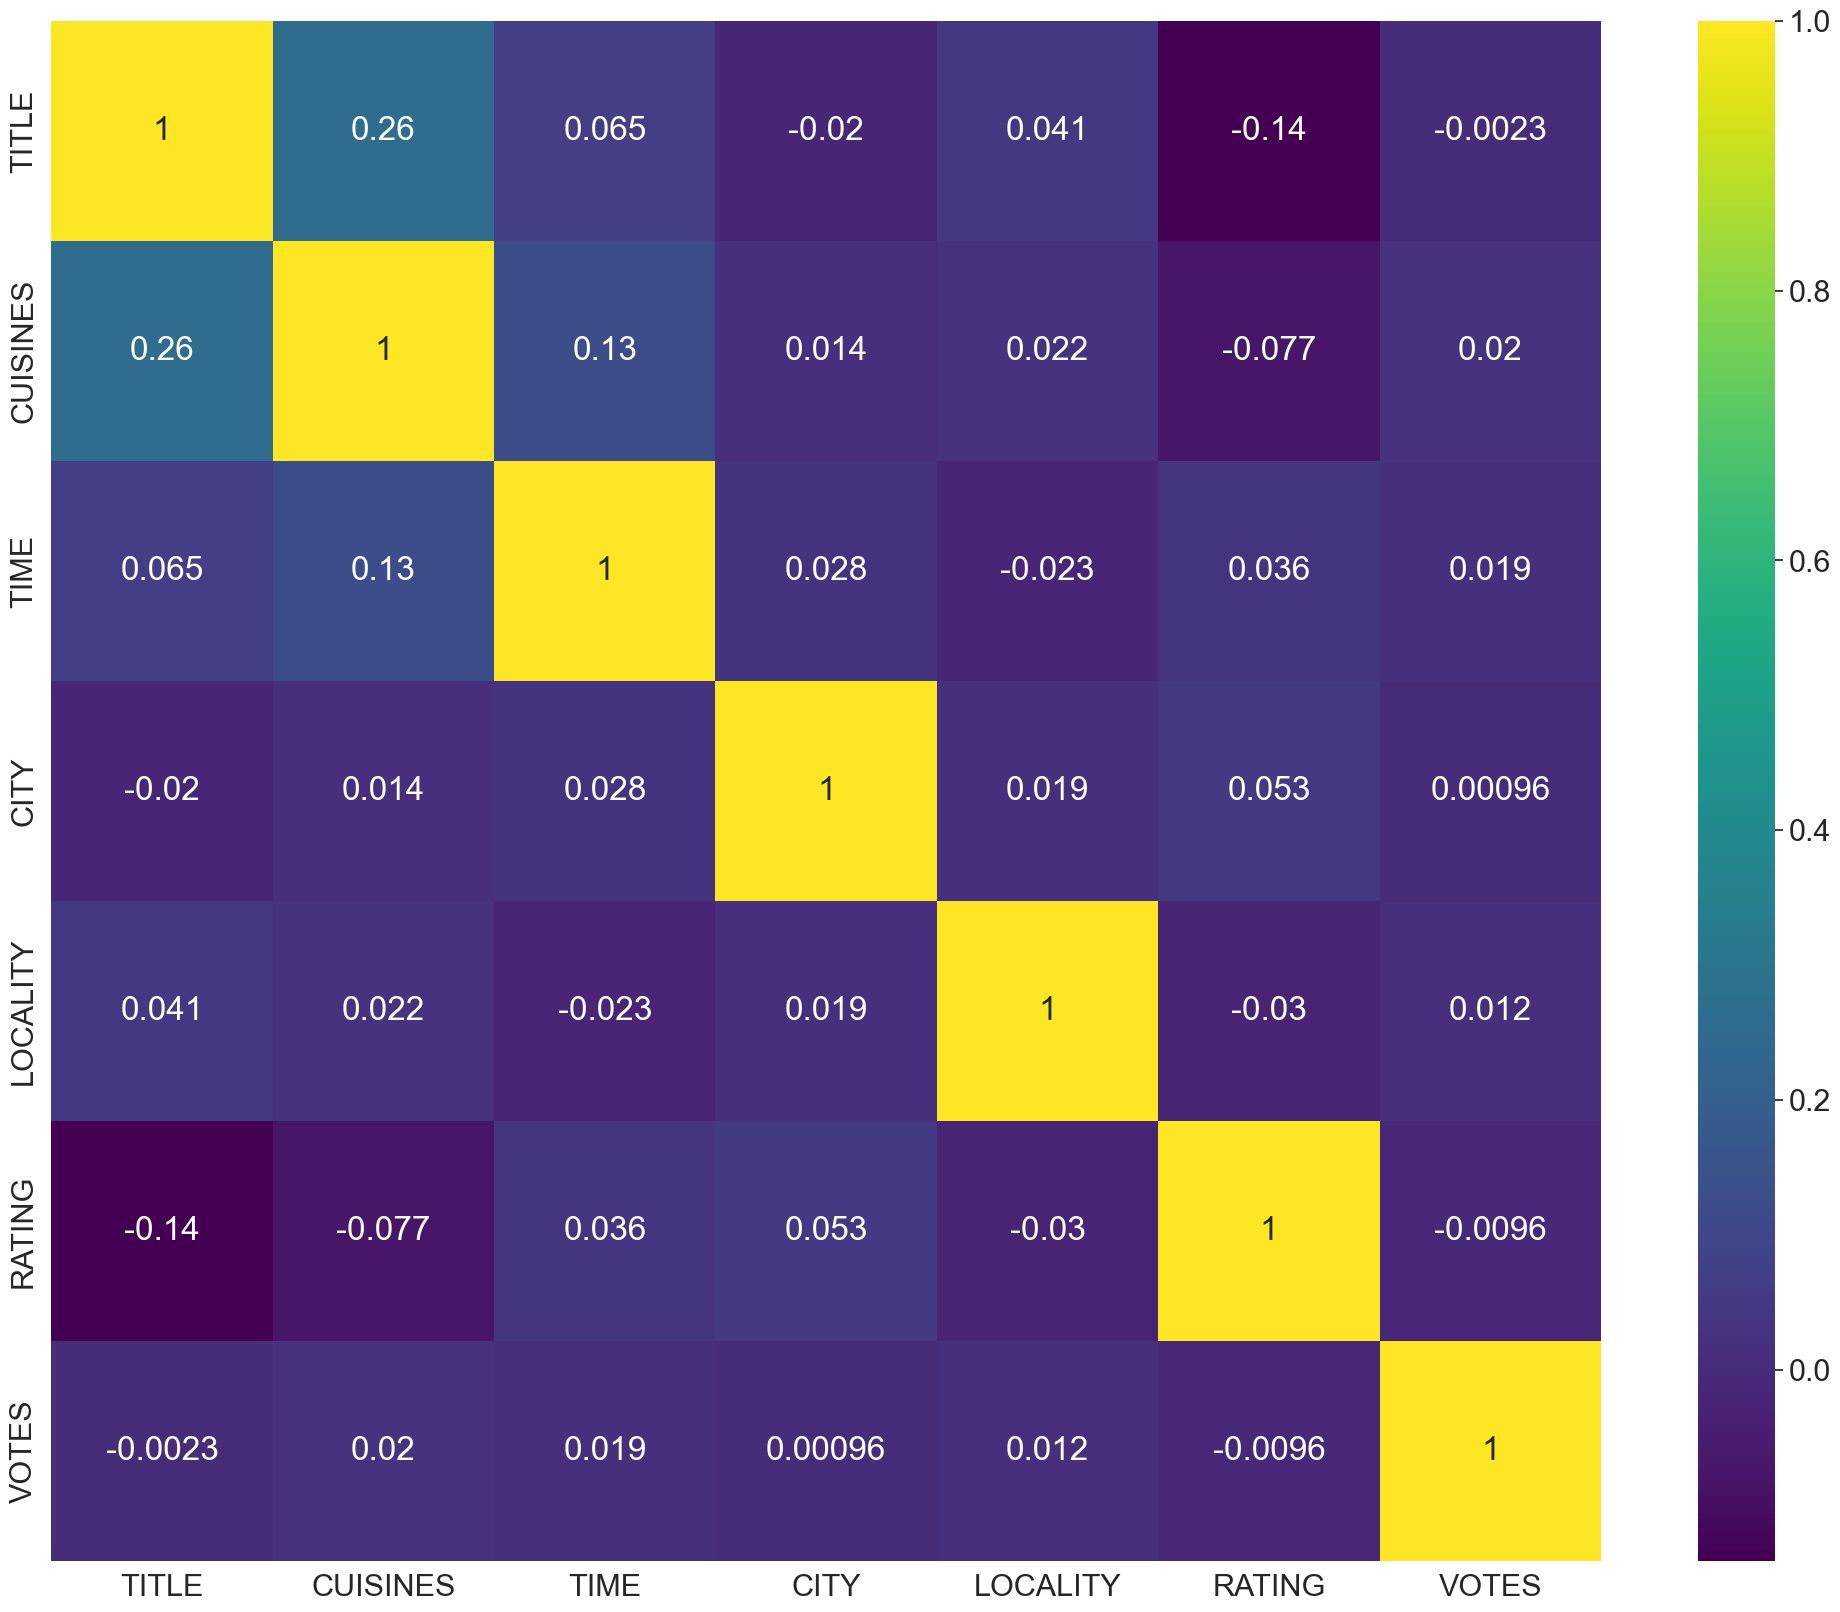

In [106]:
# Visualizing correlation of the dataset in heatmap

plt.figure(figsize=(25,20))
sns.heatmap(resturant_test.corr(),annot=True,cmap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

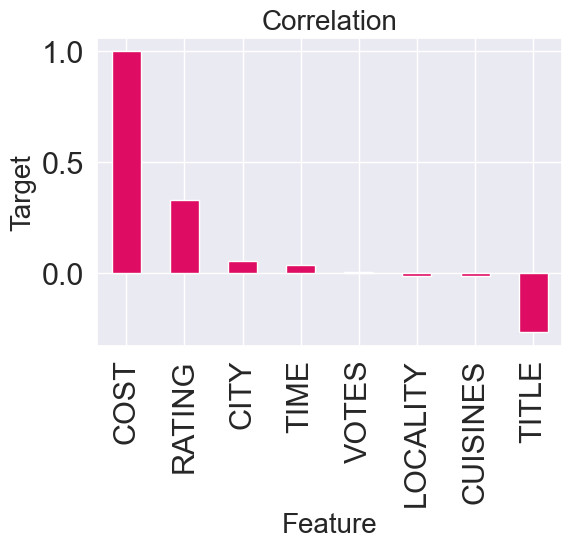

In [114]:
# Visualizing the correlation of the features with target variable price range

plt.figure(figsize=(6,4))
resturant_train.corr()['COST'].sort_values(ascending=False).plot(kind='bar',color='#de0c62')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [121]:
resturant_train.corr()['COST'].sort_values(ascending = False)

COST        1.000000
RATING      0.326944
CITY        0.055071
TIME        0.033571
VOTES       0.005390
LOCALITY   -0.013020
CUISINES   -0.017099
TITLE      -0.265785
Name: COST, dtype: float64

The column 'COST, RATING, CITY, TIMES, VOTES are positively correlated with target variable
The column 'LOCALITY', CUISINES, TITLE are negatively correlated with target variable'COST'.

# Removing and checking for Outliers

In [125]:
from scipy.stats import zscore

In [129]:
#Concatenating to get final dataset
df= pd.concat([resturant_train,resturant_test])
# Drop NAN indexes after concatenating
df.dropna(inplace=True)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,29,2463,700,300,267,16,1277,1200.0
1,31,275,1799,63,961,22,949,1500.0
2,29,2800,623,63,1015,18,711,800.0
3,93,3893,257,206,128,21,786,800.0
4,48,1663,581,206,573,18,469,300.0
...,...,...,...,...,...,...,...,...
12685,93,2758,1093,125,318,18,1348,500.0
12686,31,2017,1125,206,125,23,191,1800.0
12687,69,1963,1086,223,1241,20,1427,1300.0
12688,29,3305,1754,63,584,15,995,400.0


In [134]:
df.isnull().any().sum()

0

The dataset no longer contains any null values after the removal process.

In [130]:
z = np.abs(zscore(df))

threshold=3

In [131]:
df_new = df[(z<3).all(axis=1)]

In [132]:
df.shape

(11393, 8)

In [133]:
df_new.shape

(11114, 8)

In [135]:
print("Data Loss Percentage :",((df.shape[0]-df_new.shape[0])/df.shape[0])*100) 

Data Loss Percentage : 2.448872114456245


# Checking Skewness

In [139]:
# Checking skewness
df_new.skew().sort_values(ascending=False)

LOCALITY    0.336641
TIME        0.317095
CITY        0.304252
COST        0.006453
TITLE       0.004228
VOTES      -0.182717
CUISINES   -0.204975
RATING     -0.385804
dtype: float64

# Removing skewness

In [137]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['COST']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
df_new[skew] = pt.fit_transform(df_new[skew].values)

In [140]:
df_new.skew().sort_values(ascending=False)

LOCALITY    0.336641
TIME        0.317095
CITY        0.304252
COST        0.006453
TITLE       0.004228
VOTES      -0.182717
CUISINES   -0.204975
RATING     -0.385804
dtype: float64

# Splitting the Dataset

In [158]:
x = df_new.drop('COST',axis=1)
x.head(5)


,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,29,2463,700,300,267,16,1277
1,31,275,1799,63,961,22,949
2,29,2800,623,63,1015,18,711
3,93,3893,257,206,128,21,786
4,48,1663,581,206,573,18,469


In [159]:
# Splitting the target variable for train, test

y = df_new['COST']
y.shape

(11114,)

In [160]:
x.shape

(11114, 7)

# Standard scaling


In [162]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x_scaled

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.858741,0.314893,-0.573207,2.122136,-0.919597,-0.453797,0.616422
1,-0.797320,-1.600985,0.977402,-0.864994,0.969645,1.014329,-0.036940
2,-0.858741,0.609980,-0.681848,-0.864994,1.116646,0.035578,-0.511026
3,1.106729,1.567043,-1.198247,0.937367,-1.297990,0.769641,-0.361630
4,-0.275242,-0.385611,-0.741107,0.937367,-0.086588,0.035578,-0.993080
...,...,...,...,...,...,...,...
11109,1.106729,0.573204,-0.018712,-0.083551,-0.780762,0.035578,0.757851
11110,-0.797320,-0.075638,0.026437,0.937367,-1.306156,1.259017,-1.546845
11111,0.369678,-0.122922,-0.028589,1.151634,1.731875,0.524954,0.915216
11112,-0.858741,1.052173,0.913910,-0.864994,-0.056644,-0.698485,0.054690


# Checking the Variance Inflation Factor

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x_scaled.columns
    vif['VIF Factor'] = [variance_inflation_factor(x_scaled.values,i) for i in range(x_scaled.shape[1])]
    return(vif.sort_values(by ='VIF Factor', ascending = False))
vif(x_scaled)

,Column Name,VIF Factor
0,TITLE,1.095900
1,CUISINES,1.075931
5,RATING,1.039168
2,TIME,1.017266
3,CITY,1.006751
4,LOCALITY,1.003256
6,VOTES,1.000289


In [174]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
import pickle
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [166]:
x= x_scaled

In [167]:
def random_st_reg(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = r2_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs

In [168]:
def model_fit_reg(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    r2 = r2_score(y_test,pred_test)
    mse = mean_squared_error(y_test,pred_test)
    mae = mean_absolute_error(y_test,pred_test)
    cv_score = cross_val_score(model,x,y, cv = 8)
    cv_mean = cv_score.mean()
    print("\n R2 score is ", r2)
    print("-"*50)
    print("Mean Sqaured Error is ",mse)
    print("-"*50)
    print("Mean Absolute Error is ",mae)
    print("-"*50)
    print("The cv score is ", cv_mean, "and the R2 score  is ",r2)
    print(f'\n Difference between accuracy score and cross val score {(r2-cv_mean)*100:.2f}')
    print("-"*50)


In [169]:
def model_reg(m):
    m_rs = random_st_reg(m)
    model_fit_reg(m,m_rs)

In [175]:
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(n_estimators=100), AdaBoostRegressor(),GradientBoostingRegressor(), ExtraTreesRegressor(), XGBRegressor()]


In [176]:
for i in models:
    model_reg(i)


 LinearRegression()
At random state  45 the model is having accuracy score of  0.2876333254625365

 R2 score is  0.2876333254625365
--------------------------------------------------
Mean Sqaured Error is  0.100492533737244
--------------------------------------------------
Mean Absolute Error is  0.24219384765403912
--------------------------------------------------
The cv score is  0.2618357770097245 and the R2 score  is  0.2876333254625365

 Difference between accuracy score and cross val score 2.58
--------------------------------------------------

 KNeighborsRegressor()
At random state  42 the model is having accuracy score of  0.40297847613504945

 R2 score is  0.40297847613504945
--------------------------------------------------
Mean Sqaured Error is  0.08800814199236438
--------------------------------------------------
Mean Absolute Error is  0.2268320661021416
--------------------------------------------------
The cv score is  0.3641412179290784 and the R2 score  is  0.402


The ExtraTreesRegressor is yielding the highest accuracy rate at 68.59%.

Through the utilization of cross-validation scores, we've addressed the challenges of overfitting and underfitting. Notably, the LinearRegression model exhibits the smallest disparity between accuracy and cross-validation scores, indicating its robust performance.

we should plot the ROC-AUC curve to check the best fit model

# HyperParameter Tuning

In [177]:
# Hyper Parameter Tuning for ExtraTreesRegressor

grid_params={'n_estimators':[100,150,200],'criterion':['squared_error','friedman_mse'],
             'min_samples_split':[2,4,5,6],'min_samples_leaf':[1,2],'max_depth':[50,100,120,150]}          
        
grid = GridSearchCV(ExtraTreesRegressor(),param_grid=grid_params)

In [178]:
grid.fit(x,y)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [50, 100, 120, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 150, 200]})

In [151]:
grid.best_score_

0.6759428795046952

In [152]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 150}

In [148]:
final_model_reg= ExtraTreesRegressor(n_estimators = 150,criterion = 'squared_error',max_depth = 100,max_features = 'sqrt',min_samples_leaf = 1,min_samples_split = 4)
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 17)
final_model_reg.fit(x_train, y_train)
pred_reg= final_model_reg.predict(x_test)
print('R2 Score',r2_score(y_test,pred_reg))
print('Mean Squared Error',mean_squared_error(y_test,pred_reg))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_reg))
cv_score = cross_val_score(final_model_reg,x,y)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

R2 Score 0.8995374004890675
Mean Squared Error 9.560043146959941
Mean Absolute Error 2.297297619792998
CV score is  0.6861922621654


In [153]:
import pickle

filename = 'Resturant regression model.pkl'
pickle.dump(final_model_reg,open(filename,'wb'))

In [ ]:
original = np.array(y_test)
predicted = np.array(final_model_reg.predict(x_test))

predrainfal = pd.DataFrame({'Original Price':original,'Predicted Price':predicted})
predrainfal.sample(20)